In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file_path = '/content/drive/My Drive/Colab Notebooks/grpb datasets/uber.csv'
trips = pd.read_csv(file_path)
trips

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 9 columns]

In [10]:
#Time information is presented in two columns (key and pickup_datetime).
#data in the first column (Unnamed:0) will not be helpful to our analytics.
#removing the column 'Unnamed:0' and the column named 'key'.
del trips['Unnamed: 0']
del trips['key']
# final print
trips

fare_amount          pickup_datetime  pickup_longitude  \
0               7.5  2015-05-07 19:52:06 UTC        -73.999817   
1               7.7  2009-07-17 20:04:56 UTC        -73.994355   
2              12.9  2009-08-24 21:45:00 UTC        -74.005043   
3               5.3  2009-06-26 08:22:21 UTC        -73.976124   
4              16.0  2014-08-28 17:47:00 UTC        -73.925023   
...             ...                      ...               ...   
199995          3.0  2012-10-28 10:49:00 UTC        -73.987042   
199996          7.5  2014-03-14 01:09:00 UTC        -73.984722   
199997         30.9  2009-06-29 00:42:00 UTC        -73.986017   
199998         14.5  2015-05-20 14:56:25 UTC        -73.997124   
199999         14.1  2010-05-15 04:08:00 UTC        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0             40.738354         -73.999512         40.723217                1  
1             40.728225         -73.994710         40.750325                1  
2             40.740770         -73.962565         40.772647                1  
3             40.790844         -73.965316         40.803349                3  
4             40.744085         -73.973082         40.761247                5  
...                 ...                ...               ...              ...  
199995        40.739367         -73.986525         40.740297                1  
199996        40.736837         -74.006672         40.739620                1  
199997        40.756487         -73.858957         40.692588                2  
199998        40.725452         -73.983215         40.695415                1  
199999        40.720077         -73.985508         40.768793                1  

[200000 rows x 7 columns]

In [11]:
date_st = [dates.strip("UTC ") for dates in trips['pickup_datetime']]
trips['pickup_datetime'] = [datetime.strptime(dates, '%Y-%m-%d %H:%M:%S') for dates in date_st]
trips['pickup_datetime'] = trips['pickup_datetime'].dt.date

# final print
trips

fare_amount pickup_datetime  pickup_longitude  pickup_latitude  \
0               7.5      2015-05-07        -73.999817        40.738354   
1               7.7      2009-07-17        -73.994355        40.728225   
2              12.9      2009-08-24        -74.005043        40.740770   
3               5.3      2009-06-26        -73.976124        40.790844   
4              16.0      2014-08-28        -73.925023        40.744085   
...             ...             ...               ...              ...   
199995          3.0      2012-10-28        -73.987042        40.739367   
199996          7.5      2014-03-14        -73.984722        40.736837   
199997         30.9      2009-06-29        -73.986017        40.756487   
199998         14.5      2015-05-20        -73.997124        40.725452   
199999         14.1      2010-05-15        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 7 columns]

In [12]:
# sorting the dataframe 'trips' based on the pickup_datetime date ascending and print the head with 10 examples.
trips.sort_values(by='pickup_datetime', ascending=True, inplace=True, ignore_index=True)
trips.head(10)

fare_amount pickup_datetime  pickup_longitude  pickup_latitude  \
0         6.10      2009-01-01        -73.975759        40.749823   
1        10.10      2009-01-01        -73.982492        40.757212   
2         9.30      2009-01-01        -73.998807        40.713696   
3         7.80      2009-01-01        -73.980338        40.766303   
4         8.50      2009-01-01        -73.972600        40.749377   
5         8.50      2009-01-01        -73.981918        40.779456   
6         7.70      2009-01-01        -73.962266        40.779096   
7        32.65      2009-01-01        -73.872978        40.774098   
8         4.50      2009-01-01        -73.988440        40.740365   
9         4.60      2009-01-01        -73.965825        40.754429   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.982534         40.738737                1  
1         -73.997370         40.719370                3  
2         -73.993580         40.752576                1  
3         -73.975158         40.745811                2  
4         -73.981393         40.721997                1  
5         -73.957685         40.771043                2  
6         -73.975849         40.752208                2  
7         -73.982055         40.762908                3  
8         -73.986823         40.730197                1  
9         -73.972814         40.749124                2

In [13]:
#Calculating distances between the pick-up and drop-off locations.
from math import sqrt

lat1 = trips['pickup_latitude']
lon1 = trips['pickup_longitude']
lat2 = trips['dropoff_latitude']
lon2 = trips['dropoff_longitude']
trips['distance'] = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)
trips.tail(10)

fare_amount pickup_datetime  pickup_longitude  pickup_latitude  \
199990         7.00      2015-06-30        -73.964020        40.777203   
199991        20.50      2015-06-30        -73.967888        40.792416   
199992        75.54      2015-06-30        -73.703262        40.653118   
199993        18.50      2015-06-30        -73.991684        40.754646   
199994         6.00      2015-06-30        -73.978477        40.783051   
199995        11.50      2015-06-30        -73.961136        40.756756   
199996         8.50      2015-06-30        -73.955315        40.804562   
199997         4.50      2015-06-30        -73.963081        40.766251   
199998         9.00      2015-06-30        -74.005302        40.745792   
199999         9.50      2015-06-30        -73.982468        40.772266   

        dropoff_longitude  dropoff_latitude  passenger_count  distance  
199990         -73.980034         40.770542                1  0.017344  
199991         -74.003708         40.732464                1  0.069838  
199992         -73.703285         40.653126                1  0.000024  
199993         -73.948006         40.801373                1  0.063962  
199994         -73.970085         40.799614                5  0.018568  
199995         -73.982857         40.771587                1  0.026302  
199996         -73.942322         40.828529                1  0.027263  
199997         -73.969421         40.764351                5  0.006619  
199998         -73.980911         40.730751                1  0.028656  
199999         -73.976784         40.790325                2  0.018932

In [14]:
# Selecting all the records in January 2014 and store it in a variable called 'trip_jan14'. Finally print your dataframe that must look like the one below.
start = pd.to_datetime("2014-01-01").date()
end = pd.to_datetime("2014-01-31").date()
trip_jan14 = trips.loc[(trips['pickup_datetime'] >= start) & (trips['pickup_datetime'] <= end)]
# your final print
trip_jan14

fare_amount pickup_datetime  pickup_longitude  pickup_latitude  \
156266          8.5      2014-01-01        -73.995383        40.720680   
156267          4.0      2014-01-01        -73.981798        40.765092   
156268         26.0      2014-01-01        -73.976075        40.759432   
156269         22.5      2014-01-01        -73.982268        40.745457   
156270          5.5      2014-01-01        -73.970427        40.752365   
...             ...             ...               ...              ...   
158755         14.0      2014-01-31        -73.962542        40.772987   
158756          8.0      2014-01-31        -73.982534        40.756929   
158757          6.0      2014-01-31        -73.982652        40.745070   
158758         15.0      2014-01-31        -74.006410        40.743883   
158759          4.5      2014-01-31        -73.971601        40.787764   

        dropoff_longitude  dropoff_latitude  passenger_count  distance  
156266         -73.995978         40.736200                2  0.015531  
156267         -73.976987         40.764897                3  0.004815  
156268         -74.007680         40.740772                6  0.036702  
156269         -74.004782         40.706950                1  0.044606  
156270         -73.981125         40.747937                2  0.011578  
...                   ...               ...              ...       ...  
158755         -73.977230         40.758917                6  0.020340  
158756         -73.987059         40.760832                1  0.005976  
158757         -73.973608         40.751503                1  0.011099  
158758         -73.987823         40.756271                2  0.022337  
158759         -73.971601         40.787764                1  0.000000  

[2494 rows x 8 columns]

In [15]:
#excluding rows from the variable 'trip_jan14' that will be considered outliers. The outliers in this task are considered the values below quantile 5% and above quantile 95% for the columns 'distance' and 'fare_amount'. Therefore, selecting all rows that are within the range 5% and 95% of this two columns.
fare_low = trip_jan14['fare_amount'].quantile(0.05)
fare_hi = trip_jan14['fare_amount'].quantile(0.95)
dist_low = trip_jan14['distance'].quantile(0.05)
dist_hi = trip_jan14['distance'].quantile(0.95)

trip_outliers = trip_jan14[(trip_jan14["distance"] < dist_hi) & (trip_jan14["distance"] > dist_low) & (trip_jan14['fare_amount'] < fare_hi) & (trip_jan14['fare_amount'] > fare_low)]
trip_filtered = trip_outliers
# your final print
trip_filtered

fare_amount pickup_datetime  pickup_longitude  pickup_latitude  \
156266          8.5      2014-01-01        -73.995383        40.720680   
156268         26.0      2014-01-01        -73.976075        40.759432   
156269         22.5      2014-01-01        -73.982268        40.745457   
156270          5.5      2014-01-01        -73.970427        40.752365   
156271         17.0      2014-01-01        -73.945873        40.801373   
...             ...             ...               ...              ...   
158754          8.5      2014-01-31        -73.967885        40.763388   
158755         14.0      2014-01-31        -73.962542        40.772987   
158756          8.0      2014-01-31        -73.982534        40.756929   
158757          6.0      2014-01-31        -73.982652        40.745070   
158758         15.0      2014-01-31        -74.006410        40.743883   

        dropoff_longitude  dropoff_latitude  passenger_count  distance  
156266         -73.995978         40.736200                2  0.015531  
156268         -74.007680         40.740772                6  0.036702  
156269         -74.004782         40.706950                1  0.044606  
156270         -73.981125         40.747937                2  0.011578  
156271         -73.973143         40.743863                1  0.063648  
...                   ...               ...              ...       ...  
158754         -73.955567         40.783161                1  0.023296  
158755         -73.977230         40.758917                6  0.020340  
158756         -73.987059         40.760832                1  0.005976  
158757         -73.973608         40.751503                1  0.011099  
158758         -73.987823         40.756271                2  0.022337  

[2130 rows x 8 columns]

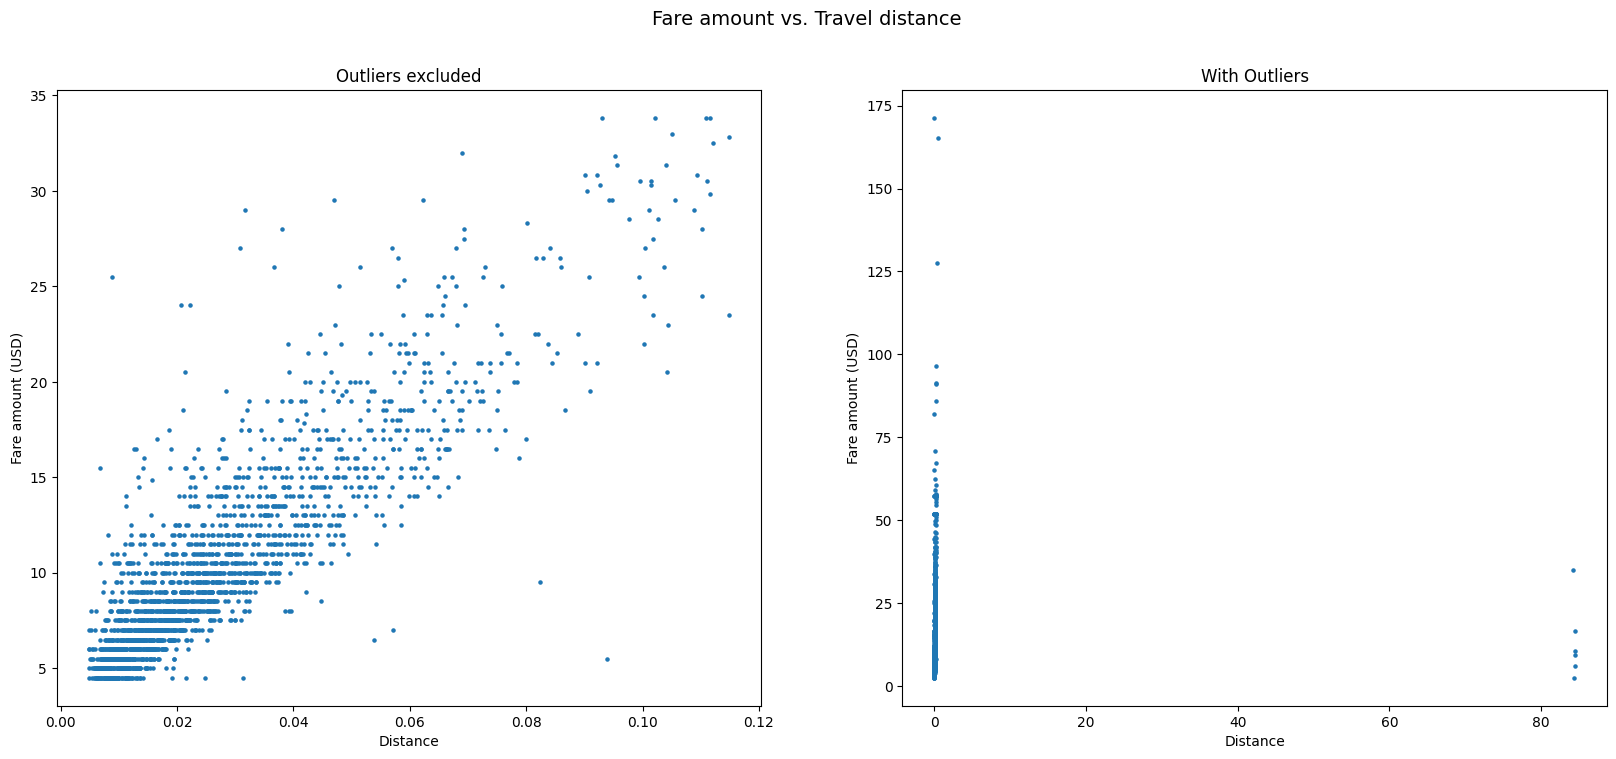

In [16]:
#Data Visualization
#Creating two scatter plots for the fare amount in y-axis and trip distances in x-axis using the two dataframes, without the outliers (i.e., stored in variable 'trip_filtered') and with the outliers (i.e., stored in variable 'trip_jan14').
fig, ax1 = plt.subplots(1,2, figsize=(20,8))
trip_filtered.plot.scatter(x='distance', y='fare_amount', s=5, ax=ax1[0], title="Outliers excluded",xlabel="Distance", ylabel="Fare amount (USD)")
trip_jan14.plot.scatter(x='distance', y='fare_amount', s=5, ax=ax1[1], title="With Outliers",xlabel="Distance", ylabel="Fare amount (USD)")
plt.suptitle("Fare amount vs. Travel distance", fontsize=14)
plt.show()

In [18]:
X = trip_filtered['distance'].values.reshape(-1, 1)        #Independent Variable
y = trip_filtered['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

[[-0.36607157]
 [ 2.88777184]
 [ 2.23700316]
 ...
 [-0.45903852]
 [-0.83090634]
 [ 0.84249884]]


In [20]:
x_std = std.fit_transform(X)
print(x_std)

[[-0.58699396]
 [ 0.48224865]
 [ 0.88140059]
 ...
 [-1.06960337]
 [-0.81087549]
 [-0.24328076]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.7742213


In [23]:
y_pred = l_reg.predict(X_test)
df = {'Actual': y_test, 'Predicted': y_pred}
df

{'Actual': array([[ 1.02843275],
        [-0.36607157],
        [-0.83090634],
        [ 0.47063102],
        [-0.9238733 ],
        [-0.55200548],
        [ 0.37766407],
        [-1.10980721],
        [-1.10980721],
        [-0.9238733 ],
        [-0.18013766],
        [-0.55200548],
        [ 0.47063102],
        [-0.27310461],
        [ 1.02843275],
        [-0.36607157],
        [-1.01684025],
        [-0.36607157],
        [-0.36607157],
        [-0.36607157],
        [ 3.16667271],
        [-1.01684025],
        [-0.83090634],
        [-1.10980721],
        [ 1.02843275],
        [-0.08717071],
        [-0.08717071],
        [ 0.47063102],
        [ 0.84249884],
        [ 0.84249884],
        [ 1.40030057],
        [-0.83090634],
        [-1.01684025],
        [-0.45903852],
        [ 0.9354658 ],
        [ 0.0987632 ],
        [-0.36607157],
        [-0.27310461],
        [-0.9238733 ],
        [ 0.47063102],
        [-0.08717071],
        [ 0.65656493],
        [ 0.00579625],
 

In [24]:
!pip install tabulate

In [25]:
from tabulate import tabulate
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+-------------+--------------+
|      Actual |    Predicted |
|-------------+--------------|
|  1.02843    | -0.184749    |
| -0.366072   | -0.379188    |
| -0.830906   | -0.469004    |
|  0.470631   |  0.45027     |
| -0.923873   | -0.867893    |
| -0.552005   | -0.608699    |
|  0.377664   |  0.317061    |
| -1.10981    | -0.8609      |
| -1.10981    | -0.766916    |
| -0.923873   | -0.856356    |
| -0.180138   | -0.736829    |
| -0.552005   | -0.0609121   |
|  0.470631   |  0.801232    |
| -0.273105   |  0.131945    |
|  1.02843    |  0.0469107   |
| -0.366072   | -0.293227    |
| -1.01684    | -0.863122    |
| -0.366072   | -0.16557     |
| -0.366072   | -0.0529477   |
| -0.366072   | -0.27436     |
|  3.16667    |  3.29898     |
| -1.01684    | -0.737457    |
| -0.830906   | -0.65613     |
| -1.10981    | -0.780289    |
|  1.02843    |  1.04228     |
| -0.0871707  | -0.0643691   |
| -0.0871707  | -0.275547    |
|  0.470631   |  0.75573     |
|  0.842499   |  1.11876     |
|  0.842

In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.33428235687706626
Mean Squared Error: 0.21328011425528853
Root Mean Squared Error: 0.4618226004163163


In [27]:
print(l_reg.intercept_)
print(l_reg.coef_)

[0.0048171]
[[0.87448463]]


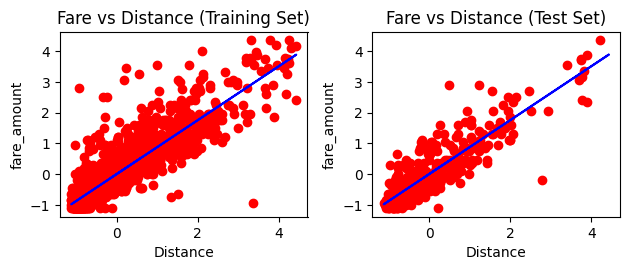

In [28]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()